# BÀI TẬP VỀ NHÀ: HỒI QUY TUYẾN TÍNH
## Dự đoán giá nhà sử dụng Linear Regression

---

### Giới thiệu về Hồi quy tuyến tính

**Hồi quy tuyến tính (Linear Regression)** là thuật toán học máy giám sát cơ bản dùng để dự đoán giá trị liên tục. Thuật toán tìm mối quan hệ tuyến tính giữa biến độc lập (input) và biến phụ thuộc (output).

**Công thức toán học:**
```
y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε
```
Trong đó:
- y: biến phụ thuộc (giá nhà)
- x₁, x₂, ..., xₙ: các biến độc lập (diện tích, số phòng, ...)
- β₀: hệ số chặn (intercept)
- β₁, β₂, ..., βₙ: các hệ số hồi quy (coefficients)
- ε: sai số

**Ví dụ thực tế:** 
Giả sử giá nhà = 50,000 + 10,000 × số_phòng + 2,000 × tuổi_nhà. Một căn nhà 5 phòng, 8 năm tuổi sẽ có giá dự đoán: 50,000 + 10,000×5 + 2,000×8 = 116,000 USD.

---

### Mô tả bài toán

Bạn là data scientist làm việc cho một công ty bất động sản. Nhiệm vụ của bạn là xây dựng mô hình dự đoán giá nhà dựa trên các đặc điểm của khu vực.

**Dữ liệu bao gồm:**
- `Thu_nhap_TB_khu_vuc`: Thu nhập trung bình của khu vực (USD)
- `Tuoi_nha_TB`: Tuổi trung bình của nhà trong khu vực (năm)
- `So_phong_TB`: Số phòng trung bình
- `So_phong_ngu_TB`: Số phòng ngủ trung bình
- `Dan_so_khu_vuc`: Dân số khu vực
- `Gia_nha`: Giá nhà (USD) - **biến cần dự đoán**

---

## Bước 1: Import thư viện và đọc dữ liệu

**Yêu cầu:**
- Import các thư viện: pandas, numpy, matplotlib, seaborn, sklearn
- Đọc file `du_lieu_gia_nha.csv` vào DataFrame
- Hiển thị 5 dòng đầu và thông tin tổng quan về dữ liệu

In [12]:
# TODO: Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [4]:
# TODO: Đọc dữ liệu từ file CSV

df_GiaNha = pd.read_csv('du_lieu_gia_nha.csv')


In [5]:
# TODO: Hiển thị 5 dòng đầu

df_GiaNha.head()


,Thu_nhap_TB_khu_vuc,Tuoi_nha_TB,So_phong_TB,So_phong_ngu_TB,Dan_so_khu_vuc,Gia_nha
0,72967.14,9.02,9.77,2.41,45968.68,201051.10
1,66617.36,7.93,6.25,2.61,19412.88,163557.33
2,74476.89,7.58,5.71,2.98,33258.50,160204.00
3,83230.30,7.62,9.21,2.64,33028.47,193391.60
4,65658.47,4.88,5.34,2.75,24739.91,154233.87


In [6]:
# TODO: Hiển thị thông tin tổng quan (info, describe)

df_GiaNha.info()
df_GiaNha.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Thu_nhap_TB_khu_vuc  200 non-null    float64
 1   Tuoi_nha_TB          200 non-null    float64
 2   So_phong_TB          200 non-null    float64
 3   So_phong_ngu_TB      200 non-null    float64
 4   Dan_so_khu_vuc       200 non-null    float64
 5   Gia_nha              200 non-null    float64
dtypes: float64(6)
memory usage: 9.5 KB


,Thu_nhap_TB_khu_vuc,Tuoi_nha_TB,So_phong_TB,So_phong_ngu_TB,Dan_so_khu_vuc,Gia_nha
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,67592.290450,5.970700,7.014050,3.977050,36354.765900,192483.840600
std,9310.039223,2.372553,1.767296,1.143702,7664.284861,25610.162042
min,41802.550000,2.090000,4.070000,2.020000,19344.560000,130660.900000
25%,60948.725000,3.995000,5.472500,2.927500,31076.987500,173386.145000
50%,67958.080000,6.110000,7.005000,3.955000,36232.300000,190731.425000
75%,73008.522500,8.022500,8.500000,4.982500,41300.902500,209941.495000
max,95201.690000,9.920000,10.000000,5.990000,57059.060000,255003.680000


## Bước 2: Khám phá dữ liệu (EDA)

**Yêu cầu:**
1. Kiểm tra giá trị null
2. Vẽ biểu đồ phân phối của biến `Gia_nha`
3. Vẽ ma trận tương quan (correlation matrix) giữa các biến
4. Vẽ scatter plot giữa một số biến độc lập và `Gia_nha`

In [7]:
# TODO: Kiểm tra giá trị null

print(df_GiaNha.isnull().sum())


Thu_nhap_TB_khu_vuc    0
Tuoi_nha_TB            0
So_phong_TB            0
So_phong_ngu_TB        0
Dan_so_khu_vuc         0
Gia_nha                0
dtype: int64


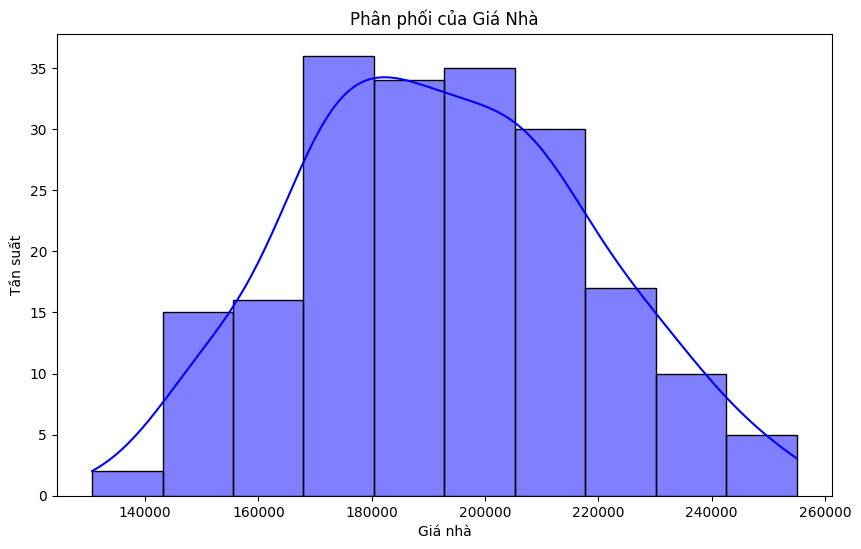

In [8]:
# TODO: Vẽ histogram phân phối giá nhà

plt.figure(figsize=(10, 6))
sns.histplot(df_GiaNha['Gia_nha'], kde=True, color='blue')
plt.title('Phân phối của Giá Nhà')
plt.xlabel('Giá nhà')
plt.ylabel('Tần suất')
plt.show()


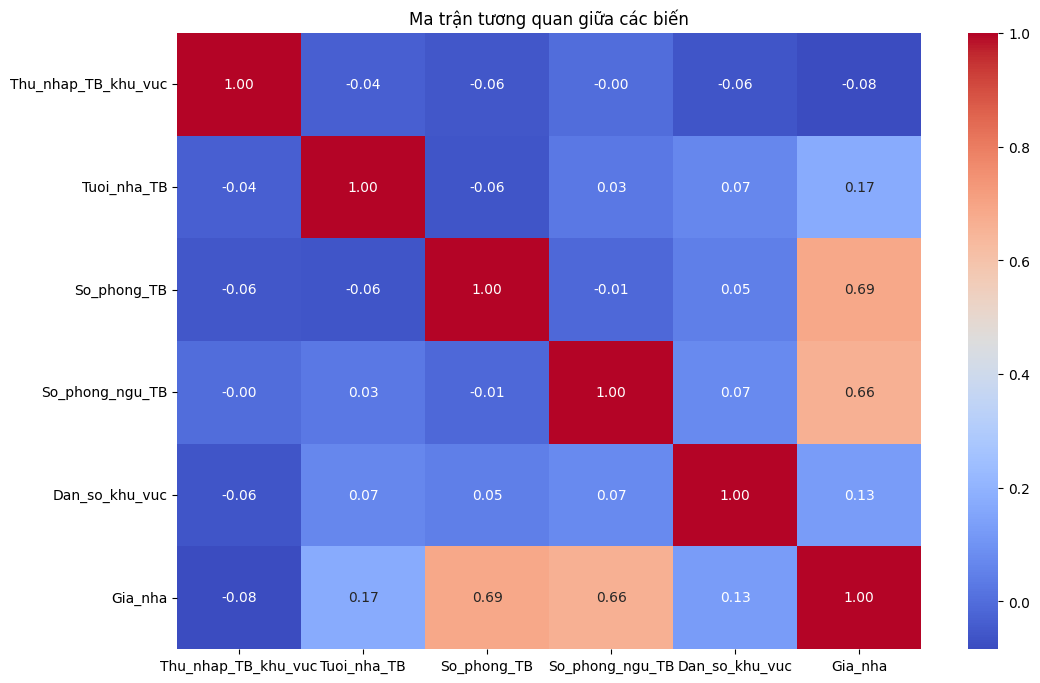

In [9]:
# TODO: Vẽ ma trận tương quan

plt.figure(figsize=(12, 8))
correlation_matrix = df_GiaNha.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến')
plt.show()


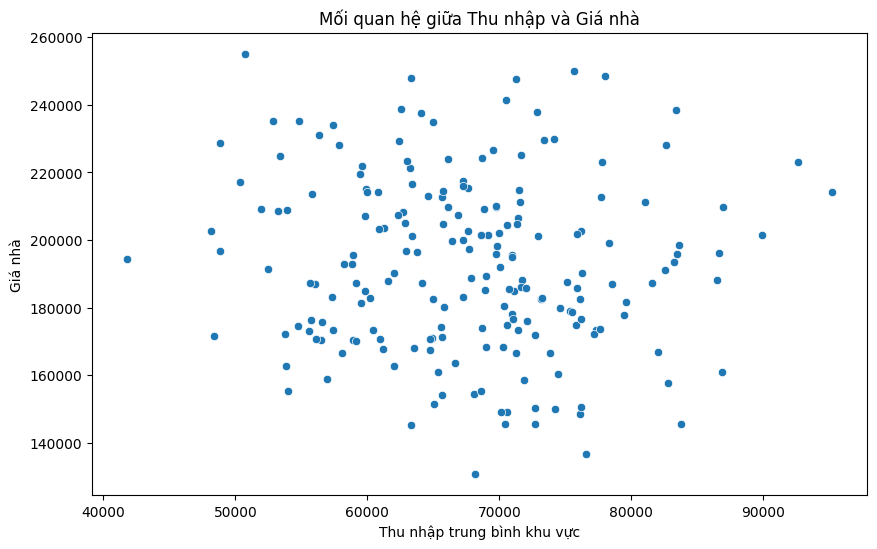

In [11]:
# TODO: Vẽ scatter plot giữa các biến và Gia_nha
# Gợi ý: Sử dụng plt.scatter() hoặc sns.pairplot()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_GiaNha, x='Thu_nhap_TB_khu_vuc', y='Gia_nha')
plt.title('Mối quan hệ giữa Thu nhập và Giá nhà')
plt.xlabel('Thu nhập trung bình khu vực')
plt.ylabel('Giá nhà')
plt.show()


## Bước 3: Chuẩn bị dữ liệu

**Yêu cầu:**
1. Tách dữ liệu thành X (features) và y (target)
2. Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80-20)
3. Thực hiện chuẩn hóa dữ liệu (StandardScaler)

In [14]:
# TODO: Tách X và y

X = df_GiaNha.drop('Gia_nha', axis=1)
y = df_GiaNha['Gia_nha']

In [15]:
# TODO: Chia train-test split (80-20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Kích thước tập huấn luyện: {X_train.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}")


Kích thước tập huấn luyện: (160, 5)
Kích thước tập kiểm tra: (40, 5)


In [16]:
# TODO: Chuẩn hóa dữ liệu với StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Bước 4: Xây dựng và huấn luyện mô hình

**Yêu cầu:**
1. Khởi tạo mô hình Linear Regression
2. Huấn luyện mô hình với dữ liệu train
3. Hiển thị các hệ số (coefficients) và intercept

In [17]:
# TODO: Khởi tạo và huấn luyện mô hình

model = LinearRegression()
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:
# TODO: Hiển thị coefficients và intercept

print(f"Intercept (Hệ số chặn): {model.intercept_}")
coefficients_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCác hệ số (Coefficients) của từng biến:")
print(coefficients_df)

Intercept (Hệ số chặn): 192510.89718749997

Các hệ số (Coefficients) của từng biến:
                      Coefficient
Thu_nhap_TB_khu_vuc   -591.116036
Tuoi_nha_TB           4835.337550
So_phong_TB          17809.903998
So_phong_ngu_TB      17007.056484
Dan_so_khu_vuc        1001.424192


## Bước 5: Đánh giá mô hình

**Yêu cầu:**
1. Dự đoán giá nhà trên tập test
2. Tính các metrics: MAE, MSE, RMSE, R²
3. Vẽ biểu đồ so sánh giá thực tế vs giá dự đoán
4. Vẽ biểu đồ phân phối của residuals (sai số)

In [19]:
# TODO: Dự đoán trên tập test

predictions = model.predict(X_test_scaled)


In [20]:
# TODO: Tính MAE, MSE, RMSE, R²

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', metrics.r2_score(y_test, predictions))


MAE: 3620.62539198439
MSE: 19801691.19414968
RMSE: 4449.90912201021
R2 Score: 0.9723322864549651


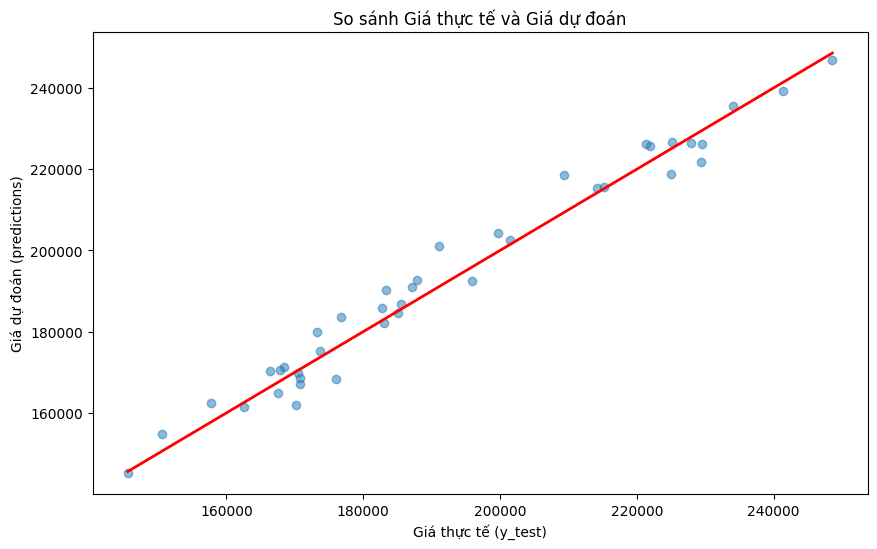

In [21]:
# TODO: Vẽ biểu đồ so sánh actual vs predicted

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Giá thực tế (y_test)')
plt.ylabel('Giá dự đoán (predictions)')
plt.title('So sánh Giá thực tế và Giá dự đoán')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()

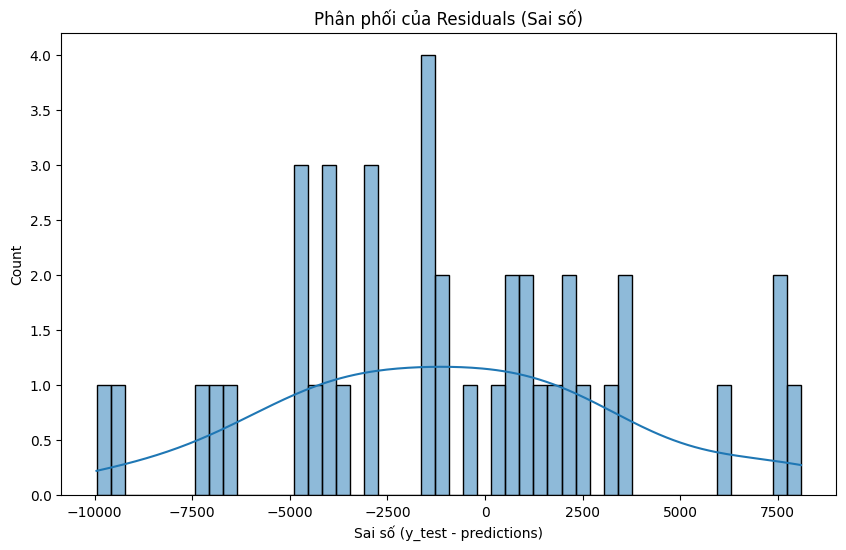

In [22]:
# TODO: Vẽ histogram của residuals

plt.figure(figsize=(10, 6))
sns.histplot((y_test - predictions), kde=True, bins=50)
plt.title('Phân phối của Residuals (Sai số)')
plt.xlabel('Sai số (y_test - predictions)')
plt.show()


## Bước 6: Dự đoán với dữ liệu mới

**Yêu cầu:**
- Tạo một mẫu dữ liệu mới và dự đoán giá nhà
- Ví dụ: Khu vực có thu nhập TB = 70000, tuổi nhà = 6, số phòng = 7, số phòng ngủ = 4, dân số = 35000

In [30]:
# TODO: Dự đoán giá nhà cho dữ liệu mới

#Khu vực có thu nhập TB = 70000, tuổi nhà = 6, số phòng = 7, số phòng ngủ = 4, dân số = 35000
new_data = [[70000, 6, 7, 4, 35000]]

new_data_scaled = scaler.transform(new_data)
predicted_price = model.predict(new_data_scaled)
print(f"Giá nhà dự báo cho khu vực này là: {predicted_price[0]:,.2f} USD")


Giá nhà dự báo cho khu vực này là: 192,602.98 USD


c:\Program Files\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


---

## Câu hỏi thảo luận

1. Biến nào có ảnh hưởng lớn nhất đến giá nhà? Giải thích dựa trên coefficients.
2. Mô hình có hoạt động tốt không? Đánh giá dựa trên R² score.
3. Residuals có phân phối chuẩn không? Điều này có ý nghĩa gì?
4. Đề xuất cách cải thiện mô hình (ví dụ: thêm features, xử lý outliers, polynomial features, ...)

---

## Lưu ý

- Nhớ thực hiện chuẩn hóa dữ liệu mới trước khi dự đoán
- Kiểm tra assumptions của Linear Regression: linearity, independence, homoscedasticity, normality
- Code phải chạy được từ đầu đến cuối không lỗi

**Chúc các bạn làm bài tốt!** 🎓

1. Biến có ảnh hưởng lớn nhất là số phòng TB, do có giá trị tuyệt đối của coefficients cao nhất
2. Mô hình hoạt động rất tốt, R2 score gần bằng 1 (0.97)
3. Residuals có phân phối chuẩn, điều này có nghĩa là các ước lượng về hệ số và các kiểm định thống kê là đáng tin cậy
4. Mô hình có thể được cải thiện bằng các cách sau: Loại bỏ các dòng dữ liệu nhà giá quá cao hoặc quá thấp (nhiễu), thu thập thêm dữ liệu (tiện ích xung quanh, khoảng cách đến trung tâm), loại bỏ các biến có hệ số quá nhỏ hoặc tương quan quá thấp